<a href="https://colab.research.google.com/github/Greatmonkey2003/Data_visualization_VAC/blob/main/Data_visualization_VAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Chennai_1990_2022_Madras.csv")
df

,time,tavg,tmin,tmax,prcp
0,01-01-1990,25.2,22.8,28.4,0.5
1,02-01-1990,24.9,21.7,29.1,0.0
2,03-01-1990,25.6,21.4,29.8,0.0
3,04-01-1990,25.7,NaN,28.7,0.0
4,05-01-1990,25.5,20.7,28.4,0.0
...,...,...,...,...,...
11889,21-07-2022,28.4,24.5,32.8,21.1
11890,22-07-2022,27.8,24.6,32.2,22.1
11891,23-07-2022,27.4,24.7,32.6,18.6
11892,24-07-2022,27.8,25.0,33.3,9.1


In [4]:
from sklearn.impute import KNNImputer
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import minmax_scaling
import missingno as msno
import seaborn as sns
import scipy.stats as stats
print("\nSample Data Of Chennai\n")

print(df.head()) #5 data

print("\nNo Of Instances {} and No Of Attributes {}\n".format(len(df.axes[0]), len(df.axes[1])))




def find_missing(ds):
    mis_val = ds.isnull().sum()

    mis_val_percent = 100 * ds.isnull().sum() / len(ds)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values Count', 1: '% of Total Missing Values'})

    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Missing Values', ascending=False).round(1)

    print("\nYour selected dataframe has " + str(ds.shape[1]) + " columns.\n"
                                                              "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    return mis_val_table_ren_columns


missing_values_delhi = find_missing(df)
print(missing_values_delhi)


print("\nCentral Tendency Measures Of Data\n")

print("Mean\n", df.mean())
print("Median\n", df.median())
print("Mode\n", df.mode())

print("\n")

print("Variance And Standard Deviation Of  Data")

print(df.var(ddof=0))    #Normalizing ddof
print(df.std(ddof=0))    #Normalizing ddof


Sample Data Of Chennai

         time  tavg  tmin  tmax  prcp
0  01-01-1990  25.2  22.8  28.4   0.5
1  02-01-1990  24.9  21.7  29.1   0.0
2  03-01-1990  25.6  21.4  29.8   0.0
3  04-01-1990  25.7   NaN  28.7   0.0
4  05-01-1990  25.5  20.7  28.4   0.0

No Of Instances 11894 and No Of Attributes 5


Your selected dataframe has 5 columns.
There are 3 columns that have missing values.
      Missing Values Count  % of Total Missing Values
prcp                  4886                       41.1
tmin                  3084                       25.9
tavg                    27                        0.2

Central Tendency Measures Of Data

Mean
 tavg    28.490798
tmin    24.382770
tmax    33.908285
prcp     6.244378
dtype: float64
Median
 tavg    28.700000
tmin    24.600000
tmax    33.908285
prcp     0.000000
dtype: float64
Mode
              time  tavg  tmin       tmax  prcp
0      01-01-1990  29.7  25.0  33.908285   0.0
1      01-01-1991   NaN   NaN        NaN   NaN
2      01-01-1992   NaN   N

<ipython-input-4-f0202c78992b>:44: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Mean\n", df.mean())
<ipython-input-4-f0202c78992b>:45: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Median\n", df.median())
<ipython-input-4-f0202c78992b>:52: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pr

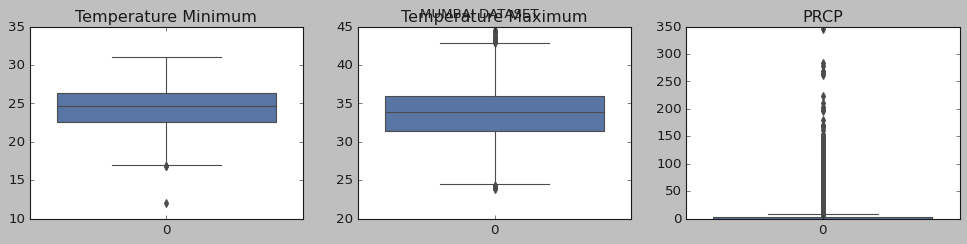

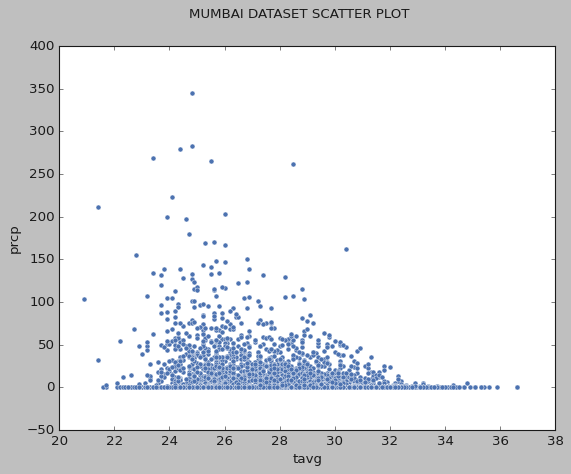

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
sns.boxplot(data=df['tmin'], ax=ax[0])
ax[0].set_title('Temperature Minimum')
sns.boxplot(data=df['tmax'], ax=ax[1])
ax[1].set_title('Temperature Maximum')
sns.boxplot(data=df['prcp'], ax=ax[2])
ax[2].set_title('PRCP')
plt.suptitle("MUMBAI DATASET")
plt.show()

sns.scatterplot(x=df['tavg'], y=df['prcp'])
plt.suptitle("MUMBAI DATASET SCATTER PLOT")
plt.show()

80    24.3
81    24.4
82    21.2
83     NaN
84     NaN
85     NaN
86    26.2
87    26.8
88    25.5
89    25.2
90    24.8
91    24.8
92    26.6
93    26.2
94     NaN
95    26.0
96    26.0
97    25.6
98    26.3
99    26.8
Name: tmin, dtype: float64


/usr/local/lib/python3.9/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


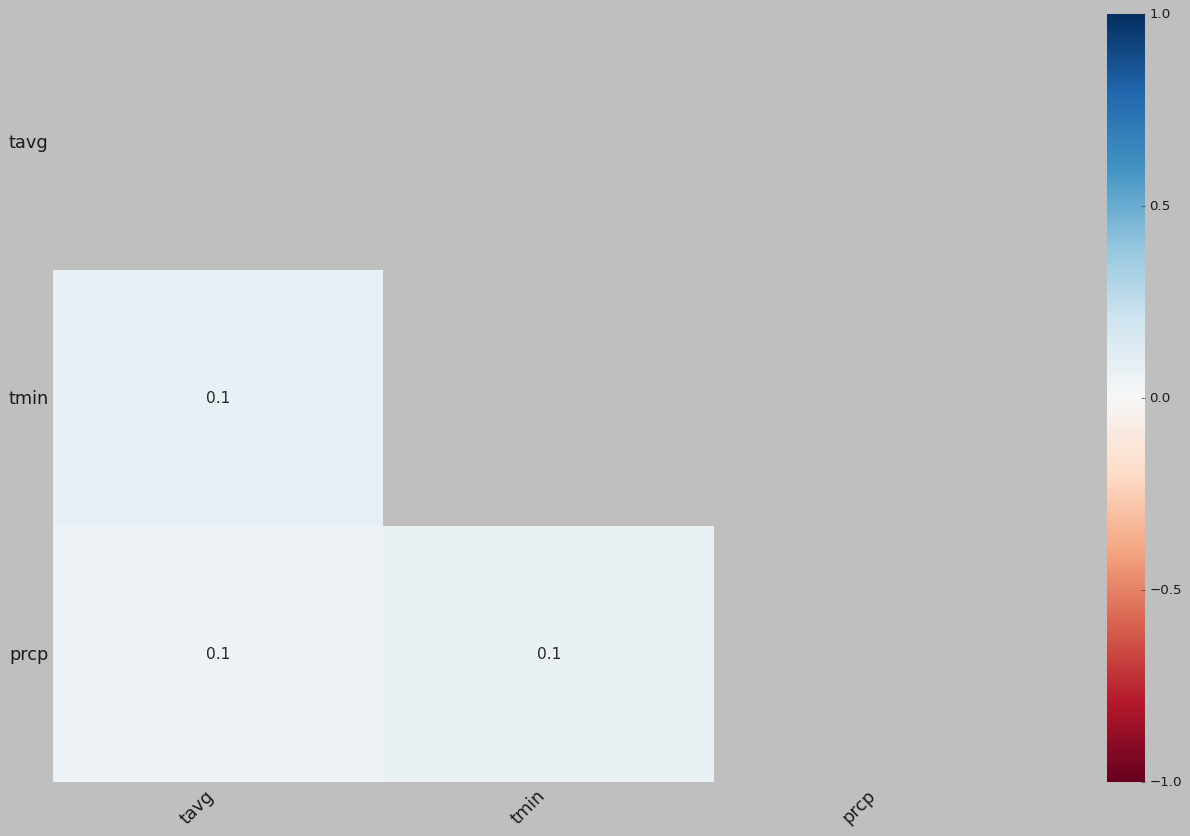

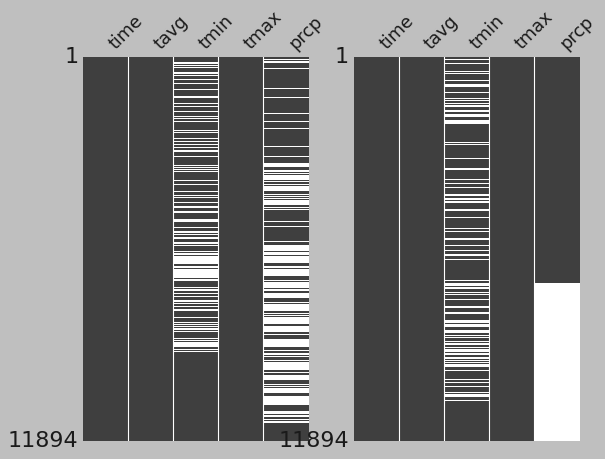


 Linear Interpolation Missing Data Filling

80    24.30
81    24.40
82    21.20
83    22.45
84    23.70
85    24.95
86    26.20
87    26.80
88    25.50
89    25.20
90    24.80
91    24.80
92    26.60
93    26.20
94    26.10
95    26.00
96    26.00
97    25.60
98    26.30
99    26.80
Name: tmin, dtype: float64
80    34.000000
81    36.200000
82    36.600000
83    33.908285
84    37.400000
85    34.400000
86    35.100000
87    34.000000
88    33.300000
89    33.100000
90    34.000000
91    35.300000
92    33.908285
93    35.000000
94    35.500000
95    33.908285
96    33.300000
97    34.400000
98    33.908285
99    37.100000
Name: tmax, dtype: float64

 K Means Missing Data Filling

80    34.000000
81    36.200000
82    36.600000
83    33.908285
84    37.400000
85    34.400000
86    35.100000
87    34.000000
88    33.300000
89    33.100000
90    34.000000
91    35.300000
92    33.908285
93    35.000000
94    35.500000
95    33.908285
96    33.300000
97    34.400000
98    33.908285
99   

In [6]:
msno.heatmap(df)

fig, ax = plt.subplots(1, 2, figsize=(15, 3))
msno.matrix(df, ax=ax[0])
print(df['tmin'][80:100])
df_copy = df.copy(deep=True)
sorted = df.sort_values('prcp')
msno.matrix(sorted, ax=ax[1])
fig.set_figwidth(8)
fig.set_figheight(6)
plt.show()
print("\n Linear Interpolation Missing Data Filling\n")

df_copy.interpolate(limit_direction="both", inplace=True)
print(df_copy['tmin'][80:100])


print(df['tmax'][80:100])
print("\n K Means Missing Data Filling\n")

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df['tmax'] = knn_imputer.fit_transform(df[['tmax']])
print(df['tmax'][80:100])

/usr/local/lib/python3.9/dist-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


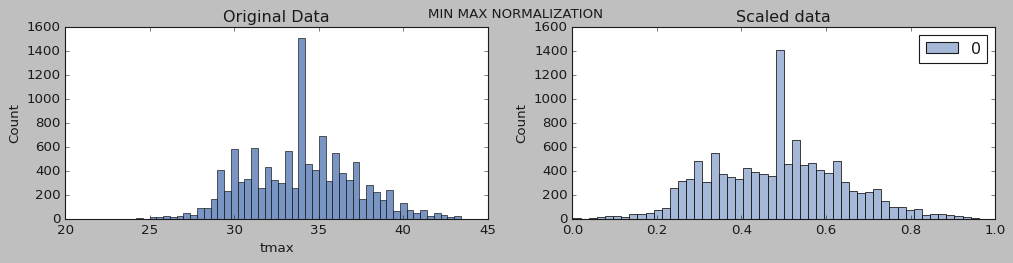

In [7]:
scaled_data = minmax_scaling(df_copy['tmax'], columns=[0])
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(df_copy['tmax'], ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.suptitle("MIN MAX NORMALIZATION")
plt.show()

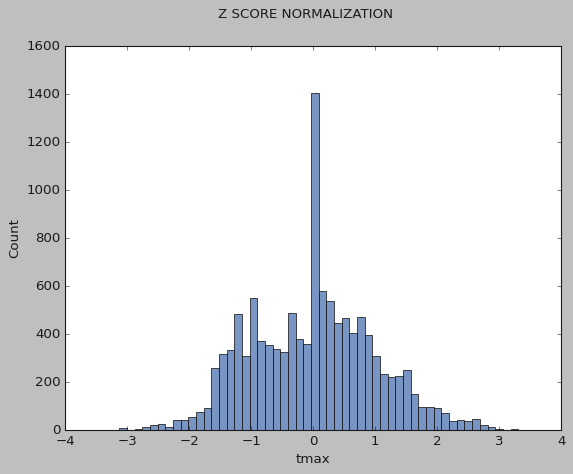

In [8]:
sns.histplot(stats.zscore(df_copy['tmax']))
plt.suptitle("Z SCORE NORMALIZATION")
plt.show()

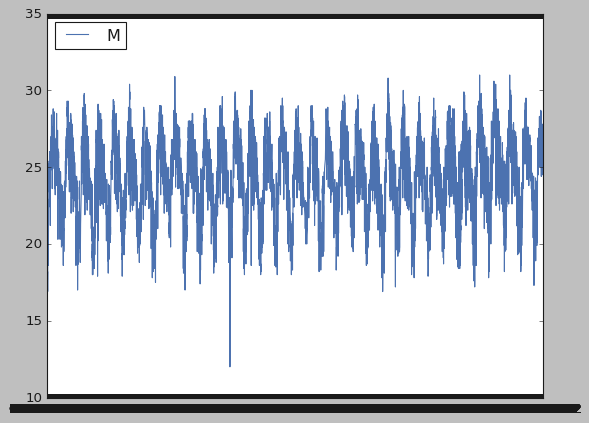

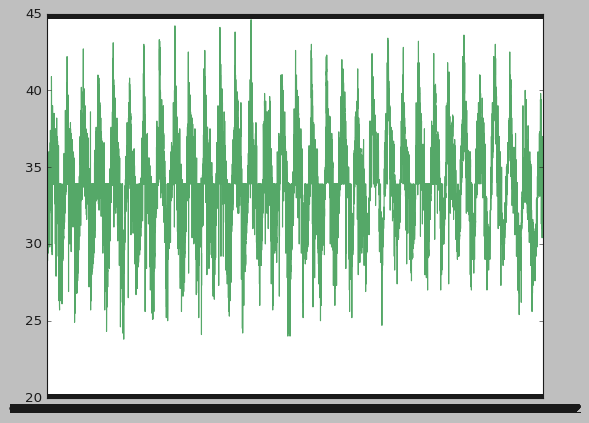

In [9]:
sns.set()
plt.style.use('classic')
plt.plot(df['time'], df_copy['tmin'])
plt.legend('Minimum Temperature', loc='upper left')

plt.show()


fig, ax = plt.subplots()
# ax = sns.lineplot(x=df['time'], y=df_copy['tmax'], data=df_copy)
# ax1 = sns.lineplot(x=df['time'], y=df['tmax'], data=df)
plt.plot(df['time'], df_copy['tmax'], color='g', label='chennai')
plt.show()